# Curse of Dimensionality

This notebook visualizes the phenomenon of the curse of dimensionality.

Notice how the nearest and farthest distances become more and more similar as the dimensionality of the ambient space increases.

In this case we are using uniformly distributed random data.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def styleset():
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size'] = 3
    matplotlib.rcParams['ytick.major.size'] = 3
    matplotlib.rcParams['xtick.minor.size'] = 2
    matplotlib.rcParams['ytick.minor.size'] = 2
    matplotlib.rcParams['font.size']       = 7
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 7
    matplotlib.rcParams['legend.fontsize'] = 7
    matplotlib.rcParams['xtick.labelsize'] = 7
    matplotlib.rcParams['ytick.labelsize'] = 7

styleset()

In [3]:
ratio = []
dists_list = []
dims_list = [10, 100, 1000, 10000, 100000]

for dims in dims_list:
    data = np.random.uniform(0, 1, size=(5000, dims))
    dists = pairwise_distances(data)
    ratio.append(dists[dists!=0].min() / dists.max())
    dists_list.append(dists)

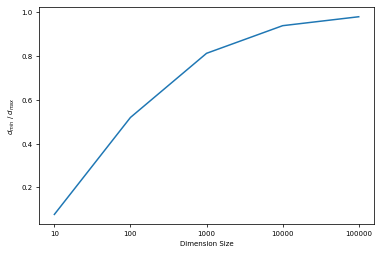

In [4]:
fig, ax = plt.subplots()
_ = ax.plot(ratio)
_ = ax.set_xlabel("Dimension Size")
_ = ax.set_ylabel("$d_{min}$ / $d_{max}$")
_ = ax.set_xticks([0, 1, 2, 3, 4])
_ = ax.set_xticklabels(["10", "100", "1000", "10000", "100000"])

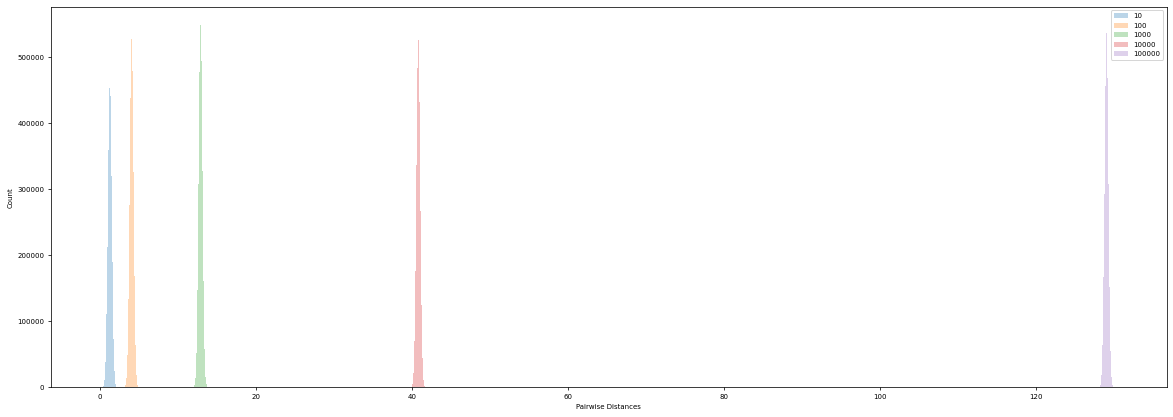

In [5]:
fig, ax = plt.subplots(figsize=(20, 7))

for i, d in enumerate(dists_list):
    dists_flattened = np.triu(d).flatten()
    dists_flattened = dists_flattened[dists_flattened != 0]
    _ = ax.hist(dists_flattened, bins=100, alpha=0.3, label=dims_list[i])
_ = ax.legend()
_ = ax.set_xlabel('Pairwise Distances')
_ = ax.set_ylabel('Count')